In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'crime-cast-forecasting-crime-categories:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F77420%2F8446444%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240810%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240810T091713Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D64ff61dbeacf04f1f876e479120367d7967c78a1b77e021192802c1593e1721fb0e58e07f31bf98df6b4bb5841326406529fd8aa1a2c849828c1dc0f61a87f98994ecc1c9b9c26139a74e9235d503262162fe1f19ed39967fefab704e2de40485f4b96103d0ae5b9479cf5641ab68f3b6dacde35cd3f2a2a9e2c630d87c02d730c9f73e7d571e96acc470ab5830b06c0624e5e65ced2bc93c7cca82576204b6c7b405b091dbe3e9dffba3689bd27e25b507c84b3eb7642e3a409e66f56a2b881e7f6dc68e13acce977204d39de0c1960ce6d995aa37b28974104cc49d73dc63ede596ad22ef76a89083ba6f18b0d3555d02bed12351b7f4aa7e58f8a572543ec'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1103010 bytes downloaded
Downloaded and uncompressed: crime-cast-forecasting-crime-categories
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test_data=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [ ]:
data_copy=data.copy()

In [ ]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [ ]:
data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')

data['Day_of_Week_Occurred'] = data['Date_Occurred'].dt.day_name()
data['Month_Occurred'] = data['Date_Occurred'].dt.month
data['Hour_Occurred'] = data['Time_Occurred'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))
data['Year_Occurred'] = data['Date_Occurred'].dt.year
data['Day_of_Month_Occurred'] = data['Date_Occurred'].dt.day

data['Day_of_Week_Reported'] = data['Date_Reported'].dt.day_name()
data['Month_Reported'] = data['Date_Reported'].dt.month
data['Year_Reported'] = data['Date_Reported'].dt.year
data['Day_of_Month_Reported'] = data['Date_Reported'].dt.day

data = data.drop(['Date_Occurred', 'Date_Reported'], axis=1)

day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

data['Day_of_Week_Occurred'] = data['Day_of_Week_Occurred'].map(day_mapping)
data['Day_of_Week_Reported'] = data['Day_of_Week_Reported'].map(day_mapping)

# data['Modus_Operandi'] = data['Modus_Operandi'].apply(lambda x: np.array(list(map(int, x.split()))) if isinstance(x, str) else [])
data.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Crime_Category,Day_of_Week_Occurred,Month_Occurred,Hour_Occurred,Year_Occurred,Day_of_Month_Occurred,Day_of_Week_Reported,Month_Reported,Year_Reported,Day_of_Month_Reported
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,1800.0,15.0,N Hollywood,1563.0,1.0,0385,...,Property Crimes,5,3,18,2020,6,1,3,2020,9
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,...,Property Crimes,4,2,13,2020,27,4,2,2020,27
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,605.0,13.0,Newton,1343.0,2.0,0329 1202,...,Property Crimes,5,8,6,2020,21,5,8,2020,21
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,1800.0,19.0,Mission,1924.0,1.0,0329 1300,...,Property Crimes,5,11,18,2020,6,7,11,2020,8
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,...,Property Crimes,2,2,11,2020,25,2,2,2020,25


In [ ]:
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')

test_data['Day_of_Week_Occurred'] = test_data['Date_Occurred'].dt.day_name()
test_data['Month_Occurred'] = test_data['Date_Occurred'].dt.month
test_data['Hour_Occurred'] = test_data['Time_Occurred'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))
test_data['Year_Occurred'] = test_data['Date_Occurred'].dt.year
test_data['Day_of_Month_Occurred'] = test_data['Date_Occurred'].dt.day

test_data['Day_of_Week_Reported'] = test_data['Date_Reported'].dt.day_name()
test_data['Month_Reported'] = test_data['Date_Reported'].dt.month
test_data['Year_Reported'] = test_data['Date_Reported'].dt.year
test_data['Day_of_Month_Reported'] = test_data['Date_Reported'].dt.day

test_data = test_data.drop(['Date_Occurred', 'Date_Reported'], axis=1)

day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

test_data['Day_of_Week_Occurred'] = test_data['Day_of_Week_Occurred'].map(day_mapping)
test_data['Day_of_Week_Reported'] = test_data['Day_of_Week_Reported'].map(day_mapping)

# test_data['Modus_Operandi'] = test_data['Modus_Operandi'].apply(lambda x: np.array(list(map(int, x.split()))) if isinstance(x, str) else [])
test_data.head()


,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Status_Description,Day_of_Week_Occurred,Month_Occurred,Hour_Occurred,Year_Occurred,Day_of_Month_Occurred,Day_of_Week_Reported,Month_Reported,Year_Reported,Day_of_Month_Reported
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,...,Invest Cont,2,3,20,2020,3,2,3,2020,3
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,...,Invest Cont,6,4,17,2020,25,1,6,2020,1
2,300 E 111TH ST,NaN,33.9348,-118.2695,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,...,Invest Cont,4,8,9,2020,27,5,8,2020,28
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,2200.0,7.0,Wilshire,765.0,1.0,NaN,...,Invest Cont,4,12,22,2020,3,3,12,2020,23
4,11000 MORRISON ST,NaN,34.1611,-118.3704,130.0,15.0,N Hollywood,1555.0,2.0,1501,...,Adult Other,6,8,1,2020,29,7,8,2020,30


In [ ]:
data['Cross_Street'].replace('nan', np.nan, inplace=True)
data['Cross_Street'].fillna('', inplace=True)

test_data['Cross_Street'].replace('nan', np.nan, inplace=True)
test_data['Cross_Street'].fillna('', inplace=True)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Time_Occurred          20000 non-null  float64
 5   Area_ID                20000 non-null  float64
 6   Area_Name              20000 non-null  object 
 7   Reporting_District_no  20000 non-null  float64
 8   Part 1-2               20000 non-null  float64
 9   Modus_Operandi         17259 non-null  object 
 10  Victim_Age             20000 non-null  float64
 11  Victim_Sex             17376 non-null  object 
 12  Victim_Descent         17376 non-null  object 
 13  Premise_Code           20000 non-null  float64
 14  Premise_Description    19995 non-null  object 
 15  We

In [ ]:
data.shape

(20000, 29)

In [ ]:
data.nunique()

,0
Location,12399
Cross_Street,1496
Latitude,3622
Longitude,3578
Time_Occurred,996
Area_ID,21
Area_Name,21
Reporting_District_no,1120
Part 1-2,2
Modus_Operandi,10489


## Descriptive EDA

In [ ]:
data.describe(exclude='number')

,Location,Cross_Street,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,20000,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1496,21,10489,4,17,216,57,5,5,6
top,6TH,,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,16552,1345,826,8538,6143,5033,3990,15236,15236,11666


In [ ]:
data.isnull().sum()

,0
Location,0
Cross_Street,0
Latitude,0
Longitude,0
Time_Occurred,0
Area_ID,0
Area_Name,0
Reporting_District_no,0
Part 1-2,0
Modus_Operandi,2741


In [ ]:
data.isin(['NA','N/A','-']).sum()

,0
Location,0
Cross_Street,0
Latitude,0
Longitude,0
Time_Occurred,0
Area_ID,0
Area_Name,0
Reporting_District_no,0
Part 1-2,0
Modus_Operandi,0


In [ ]:
(data == ' ').sum()

,0
Location,0
Cross_Street,0
Latitude,0
Longitude,0
Time_Occurred,0
Area_ID,0
Area_Name,0
Reporting_District_no,0
Part 1-2,0
Modus_Operandi,0


In [ ]:
(data.isnull().sum()*100/data.shape[0])[(data.isnull().sum()*100/data.shape[0])!=0]

,0
Modus_Operandi,13.705
Victim_Sex,13.120
Victim_Descent,13.120
Premise_Description,0.025
Weapon_Used_Code,63.325
Weapon_Description,63.325


In [ ]:
# data['Cross_Street'] = data['Cross_Street'].fillna('Unknown')
data['Modus_Operandi'] = data['Modus_Operandi'].fillna('Unknown')
data['Victim_Sex'] = data['Victim_Sex'].fillna('Unknown')
data['Victim_Descent'] = data['Victim_Descent'].fillna('Unknown')
data['Premise_Description'] = data['Premise_Description'].fillna('Unknown')
data['Weapon_Description'] = data['Weapon_Description'].fillna('Unknown')

In [ ]:
test_data['Modus_Operandi'] = test_data['Modus_Operandi'].fillna('Unknown')
test_data['Victim_Sex'] = test_data['Victim_Sex'].fillna('Unknown')
test_data['Victim_Descent'] = test_data['Victim_Descent'].fillna('Unknown')
test_data['Premise_Description'] = test_data['Premise_Description'].fillna('Unknown')
test_data['Weapon_Description'] = test_data['Weapon_Description'].fillna('Unknown')

In [ ]:
data.shape

(20000, 29)

In [ ]:
test_data.shape

(5000, 28)

In [ ]:
(data.isnull().sum()*100/data.shape[0])[(data.isnull().sum()*100/data.shape[0])!=0]

,0
Weapon_Used_Code,63.325


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Since lattitude and longitude are present we can remove CrossStreet
text_drop=['Location', 'Cross_Street','Victim_Descent']
data.drop(text_drop,axis=1, inplace=True)
test_data.drop(text_drop,axis=1, inplace=True)

In [ ]:
X=data
y = X.pop('Crime_Category')

## Exploratory Data Analysis

In [ ]:
data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Day_of_Week_Occurred,Month_Occurred,Hour_Occurred,Year_Occurred,Day_of_Month_Occurred,Day_of_Week_Reported,Month_Reported,Year_Reported,Day_of_Month_Reported
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044,4.022450,6.432300,13.352750,2020.0,15.57010,3.86810,6.410050,2020.061800,15.791450
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687,1.976649,3.459164,6.463034,0.0,8.94346,1.97109,3.452232,0.334942,8.822174
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000,1.000000,1.000000,0.000000,2020.0,1.00000,1.00000,1.000000,2020.000000,1.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000,2.000000,3.000000,9.000000,2020.0,8.00000,2.00000,3.000000,2020.000000,8.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000,4.000000,6.000000,14.000000,2020.0,16.00000,4.00000,6.000000,2020.000000,16.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000,6.000000,9.000000,19.000000,2020.0,23.00000,6.00000,9.000000,2020.000000,23.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000,7.000000,12.000000,23.000000,2020.0,31.00000,7.00000,12.000000,2024.000000,31.000000


In [ ]:
data.columns

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code',
       'Weapon_Description', 'Status', 'Status_Description',
       'Day_of_Week_Occurred', 'Month_Occurred', 'Hour_Occurred',
       'Year_Occurred', 'Day_of_Month_Occurred', 'Day_of_Week_Reported',
       'Month_Reported', 'Year_Reported', 'Day_of_Month_Reported'],
      dtype='object')

<ipython-input-1649-ee65b2ec782a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_copy, x='Crime_Category', palette='viridis')


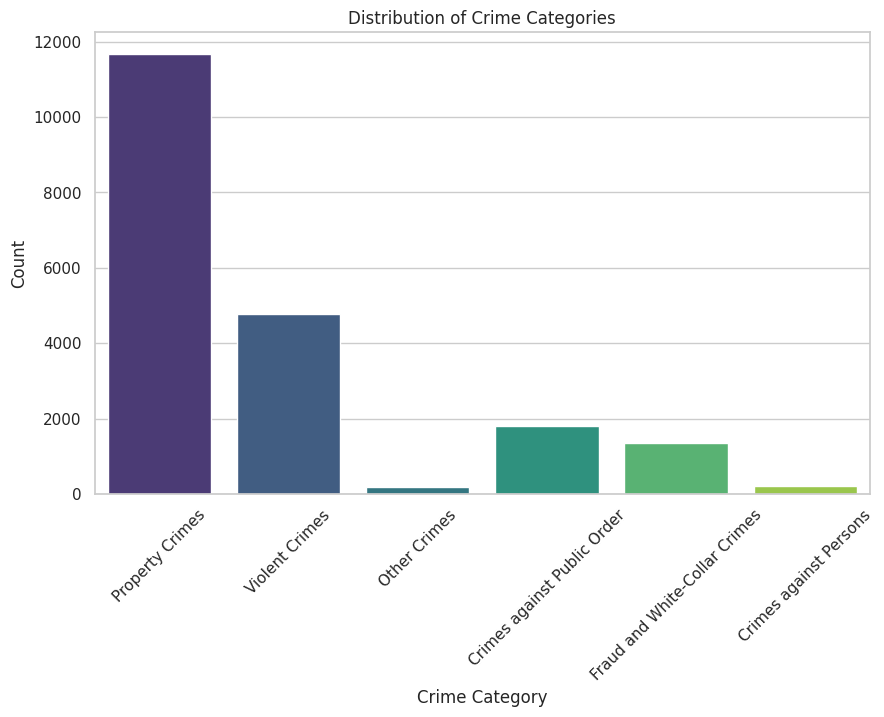

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_copy, x='Crime_Category', palette='viridis')
plt.title('Distribution of Crime Categories')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Property crimes and violent crimes are the highest

<ipython-input-1651-01a0b99a1352>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_copy, x='Area_Name', palette='coolwarm', order=data['Area_Name'].value_counts().index)


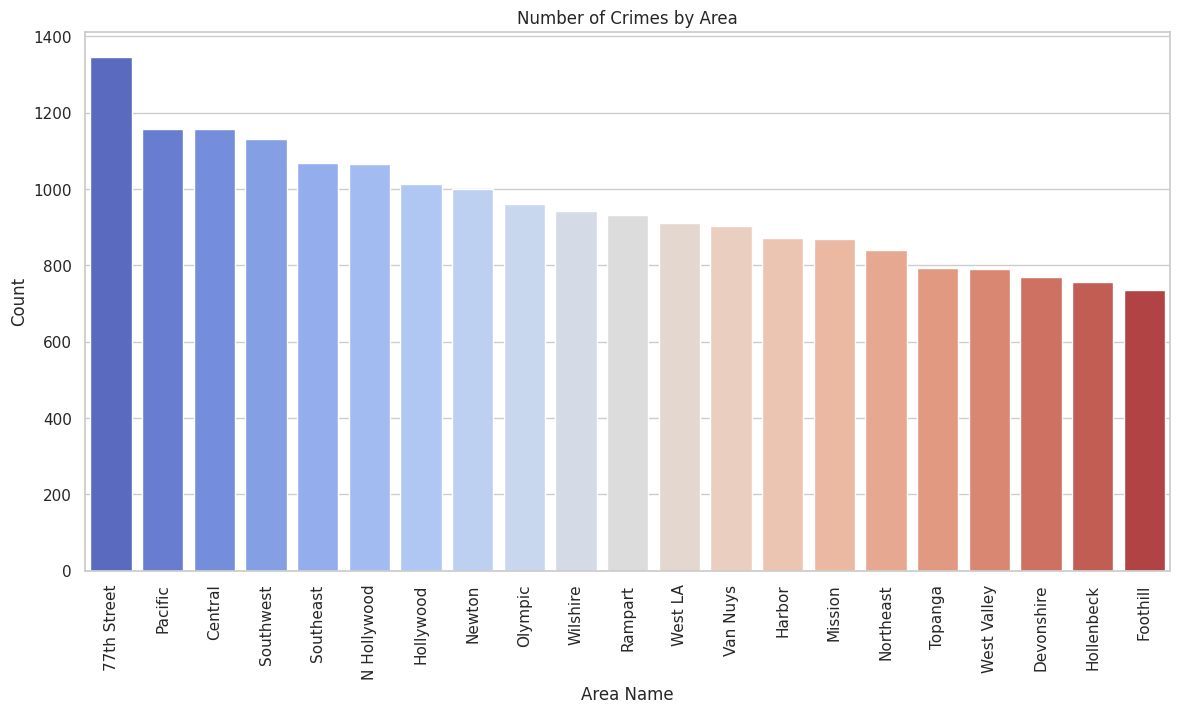

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data_copy, x='Area_Name', palette='coolwarm', order=data['Area_Name'].value_counts().index)
plt.title('Number of Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_copy['Area_Name'].unique()

array(['N Hollywood', 'Newton', 'Mission', '77th Street', 'Northeast',
       'Hollenbeck', 'Pacific', 'Van Nuys', 'Devonshire', 'Wilshire',
       'Hollywood', 'Harbor', 'Topanga', 'Central', 'West Valley',
       'Olympic', 'Foothill', 'West LA', 'Southeast', 'Southwest',
       'Rampart'], dtype=object)

In [ ]:
#800 to 1000 crimes in most areas. Highest in 77th Street

<ipython-input-1654-2aa50dcd4edc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_copy['Day_Occurred'] = pd.to_datetime(data_copy['Date_Occurred']).dt.dayofweek
<ipython-input-1654-2aa50dcd4edc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_copy, x='Day_Occurred', palette='cubehelix')


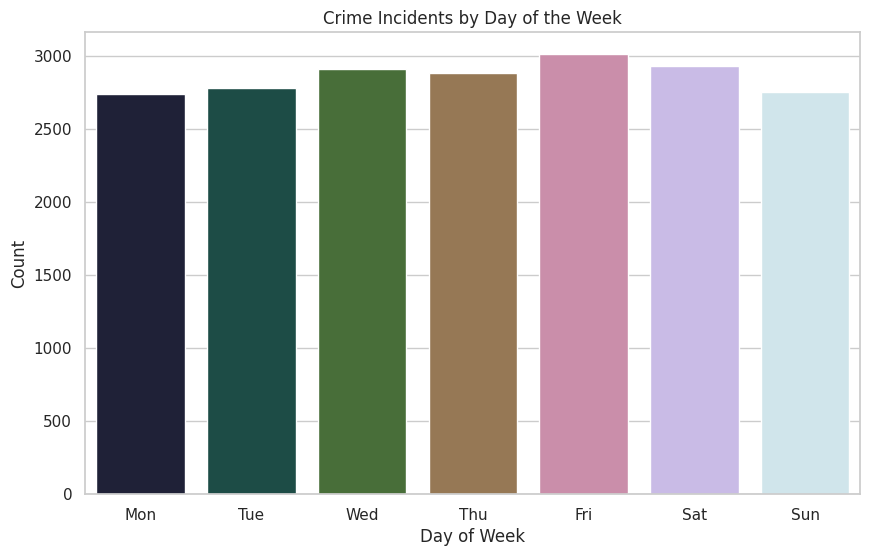

In [ ]:
data_copy['Day_Occurred'] = pd.to_datetime(data_copy['Date_Occurred']).dt.dayofweek
plt.figure(figsize=(10, 6))
sns.countplot(data=data_copy, x='Day_Occurred', palette='cubehelix')
plt.title('Crime Incidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [ ]:
#highest on fridays and saturdays and wednesdays

<ipython-input-1656-94e87b9ab316>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_copy['Month_Occurred'] = pd.to_datetime(data_copy['Date_Occurred']).dt.month


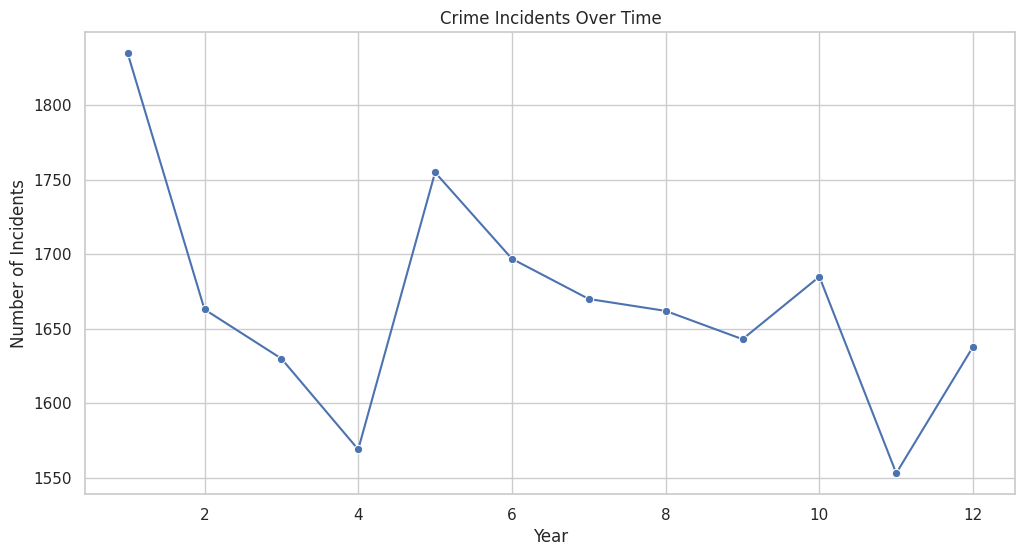

In [ ]:
plt.figure(figsize=(12, 6))
data_copy['Month_Occurred'] = pd.to_datetime(data_copy['Date_Occurred']).dt.month
sns.lineplot(data=data_copy.groupby('Month_Occurred').size().reset_index(name='Count'), x='Month_Occurred', y='Count', marker='o')
plt.title('Crime Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [ ]:
#generally declining trend in crime rate over the months of 2020

<ipython-input-1658-8bb467a4ba5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y='Weapon_Description', palette='Set2', order=top_10_weapons)


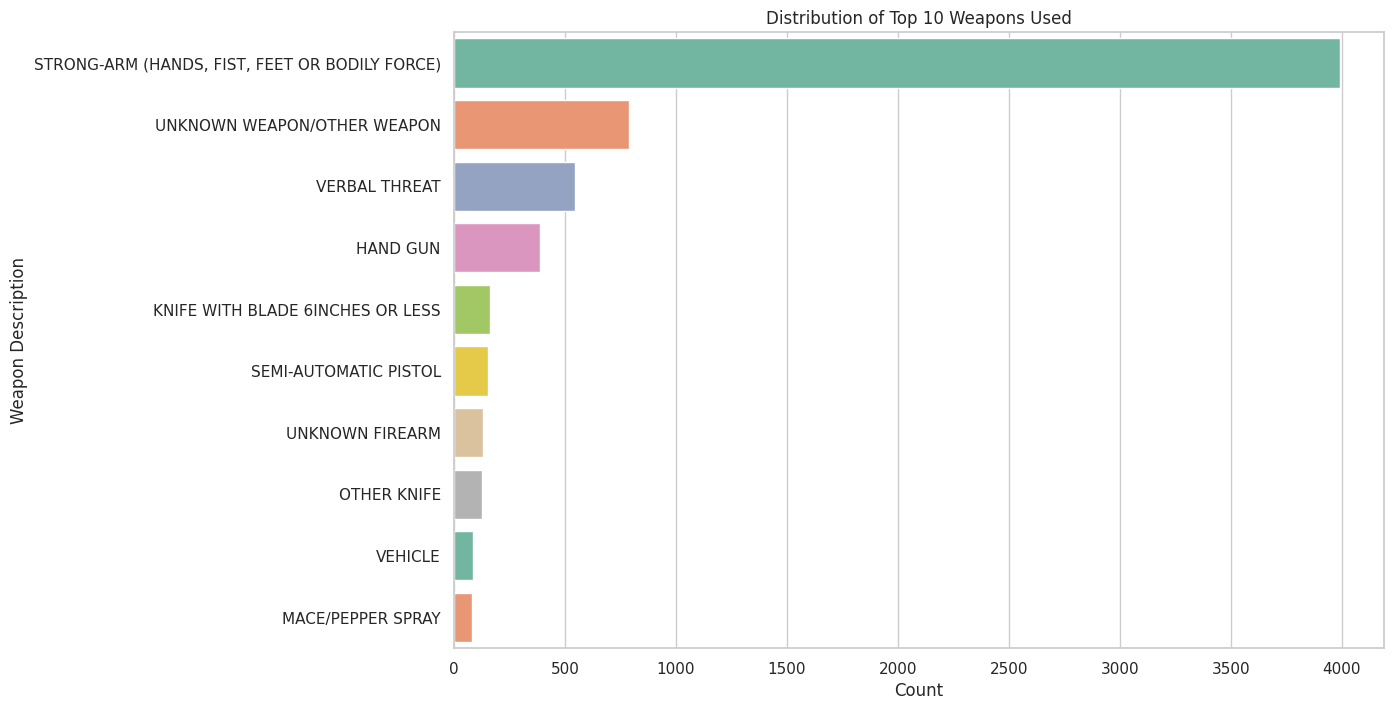

In [ ]:
top_10_weapons = data_copy['Weapon_Description'].value_counts().nlargest(10).index

filtered_data = data_copy[data_copy['Weapon_Description'].isin(top_10_weapons)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, y='Weapon_Description', palette='Set2', order=top_10_weapons)
plt.title('Distribution of Top 10 Weapons Used')
plt.xlabel('Count')
plt.ylabel('Weapon Description')
plt.show()

<ipython-input-1659-5e227f733a59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x='Crime_Category', y='Victim_Age', palette='husl')


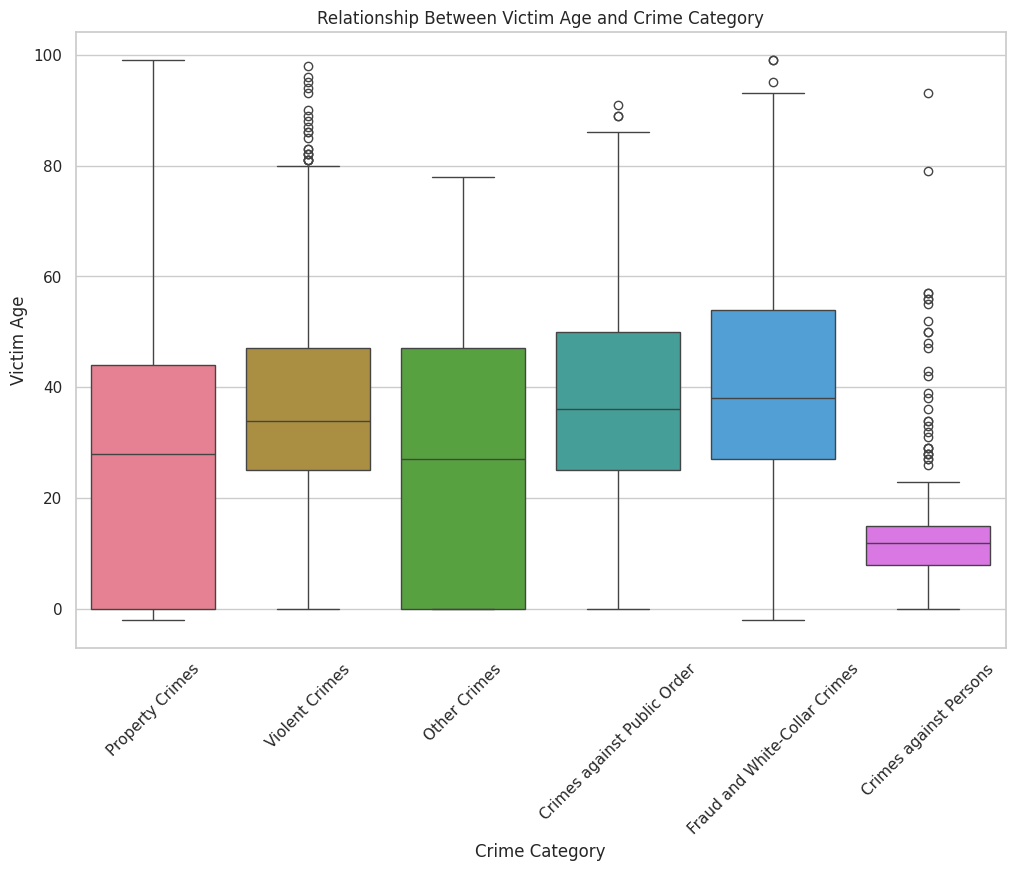

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_copy, x='Crime_Category', y='Victim_Age', palette='husl')
plt.title('Relationship Between Victim Age and Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

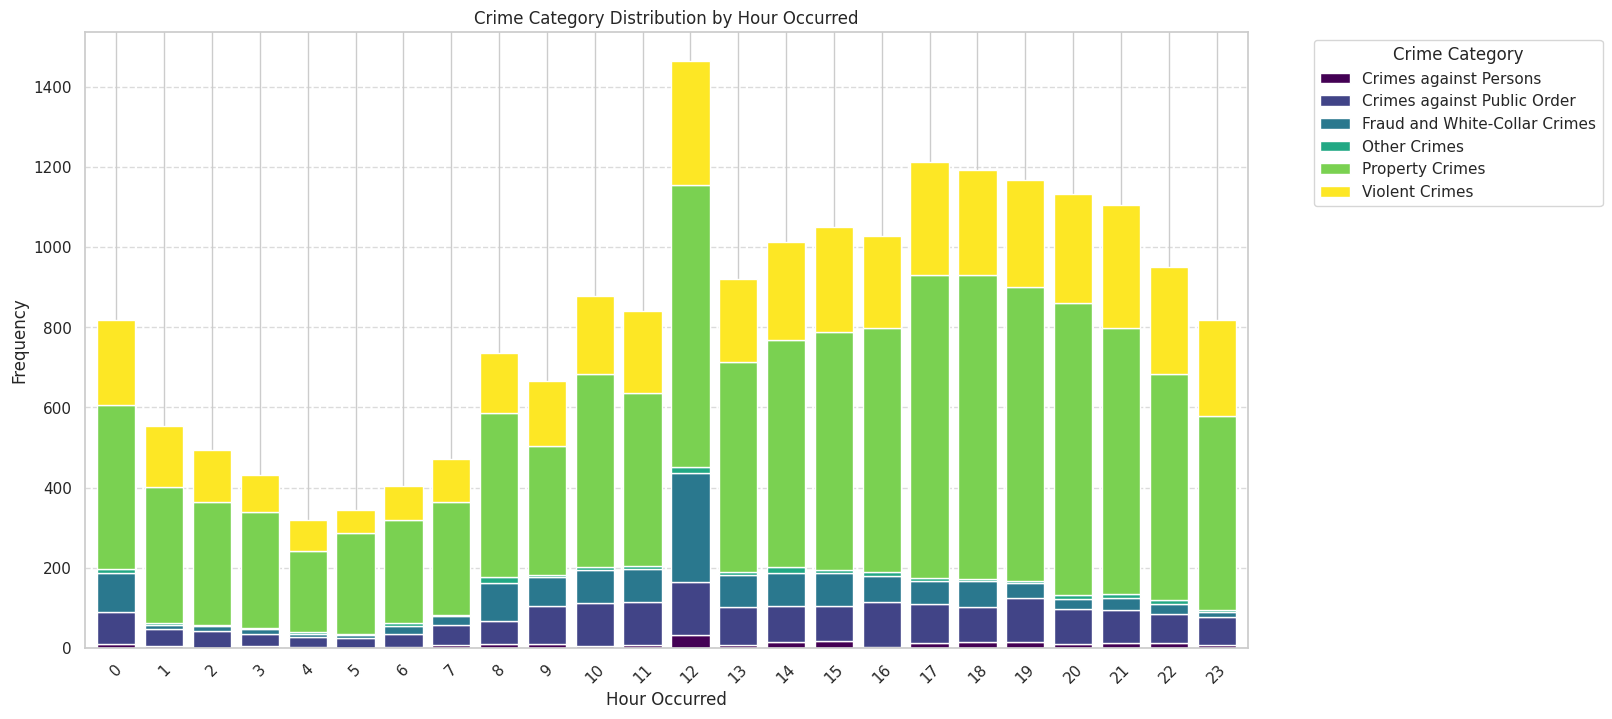

In [ ]:
data_copy['Hour_Occurred'] = data_copy['Time_Occurred'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))
hour_category_counts = data_copy.groupby(['Hour_Occurred', 'Crime_Category']).size().unstack().fillna(0)

plt.figure(figsize=(15, 8))
hour_category_counts.plot(kind='bar', stacked=True, colormap='viridis', width=0.8, figsize=(15, 8))
plt.title('Crime Category Distribution by Hour Occurred')
plt.xlabel('Hour Occurred')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
data['Victim_Age'].unique()[data['Victim_Age'].unique() <0]

array([-2., -1.])

- will have to replace negative age

In [ ]:
data[data['Victim_Age'].isin([-2,-1])]

,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,...,Status_Description,Day_of_Week_Occurred,Month_Occurred,Hour_Occurred,Year_Occurred,Day_of_Month_Occurred,Day_of_Week_Reported,Month_Reported,Year_Reported,Day_of_Month_Reported
251,34.1030,-118.3402,430.0,6.0,Hollywood,645.0,1.0,1822 1607 0216 0344,-2.0,X,...,Invest Cont,7,5,4,2020,31,5,6,2023,2
717,34.2720,-118.4978,1.0,17.0,Devonshire,1737.0,2.0,1202 0923 1822,-2.0,M,...,Invest Cont,2,6,0,2020,2,4,5,2023,25
5877,34.1459,-118.5350,1200.0,10.0,West Valley,1094.0,1.0,0389 1822 0344 1609 0321,-1.0,M,...,Invest Cont,3,1,12,2020,1,3,5,2021,19
11008,34.0432,-118.4685,1600.0,8.0,West LA,841.0,1.0,1822 1609 0344 0400,-1.0,X,...,Invest Cont,5,6,16,2020,19,1,6,2022,20
12993,34.1794,-118.4161,1200.0,9.0,Van Nuys,939.0,1.0,0344,-1.0,F,...,Invest Cont,5,3,12,2020,13,3,3,2022,16
14021,33.9598,-118.3962,300.0,14.0,Pacific,1487.0,1.0,0344,-1.0,X,...,Invest Cont,4,7,3,2020,16,2,1,2022,18


In [ ]:
mean_age = data[data['Victim_Age'] >= 0]['Victim_Age'].mean()
data['Victim_Age'] = data['Victim_Age'].apply(lambda x: x if x >= 0 else mean_age)

In [ ]:
data[data['Victim_Age'].isin([-2,-1])]

,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,...,Status_Description,Day_of_Week_Occurred,Month_Occurred,Hour_Occurred,Year_Occurred,Day_of_Month_Occurred,Day_of_Week_Reported,Month_Reported,Year_Reported,Day_of_Month_Reported


In [ ]:
mean_age = test_data[test_data['Victim_Age'] >= 0]['Victim_Age'].mean()
test_data['Victim_Age'] = test_data['Victim_Age'].apply(lambda x: x if x >= 0 else mean_age)

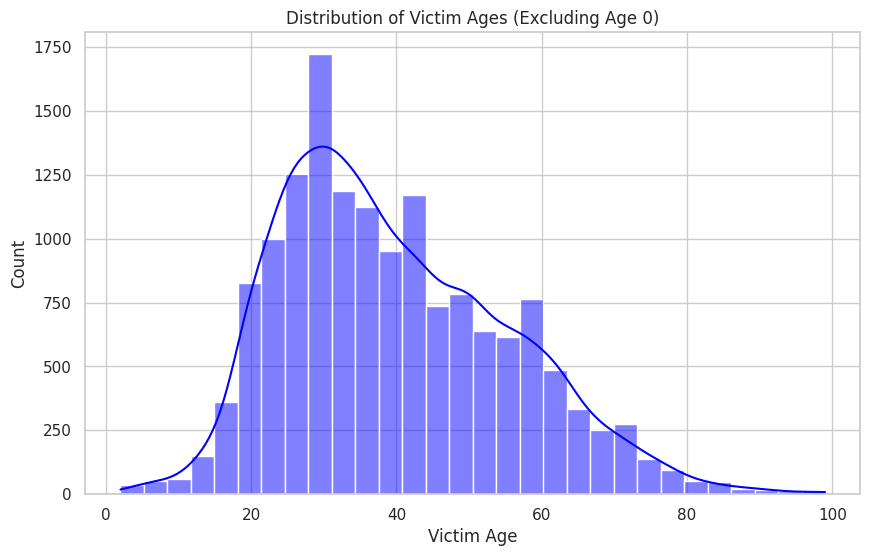

In [ ]:
filtered_data = data[data['Victim_Age'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='Victim_Age', bins=30, kde=True, color='blue')
plt.title('Distribution of Victim Ages (Excluding Age 0)')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#20 to 50 aged victims mostly

<ipython-input-1668-d60bd8471192>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_copy, x='Crime_Category', palette='viridis')


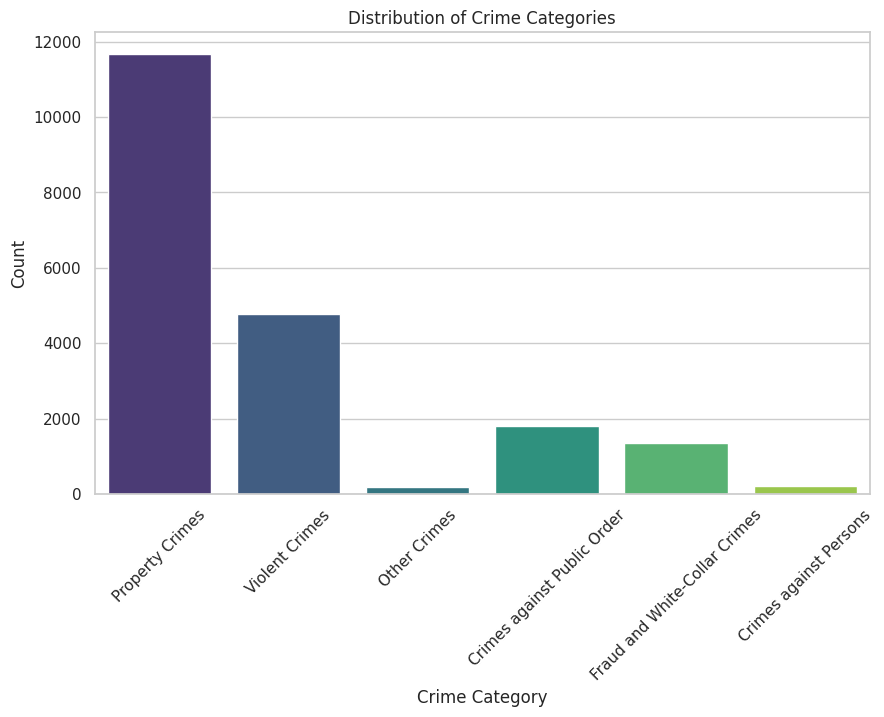

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_copy, x='Crime_Category', palette='viridis')
plt.title('Distribution of Crime Categories')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

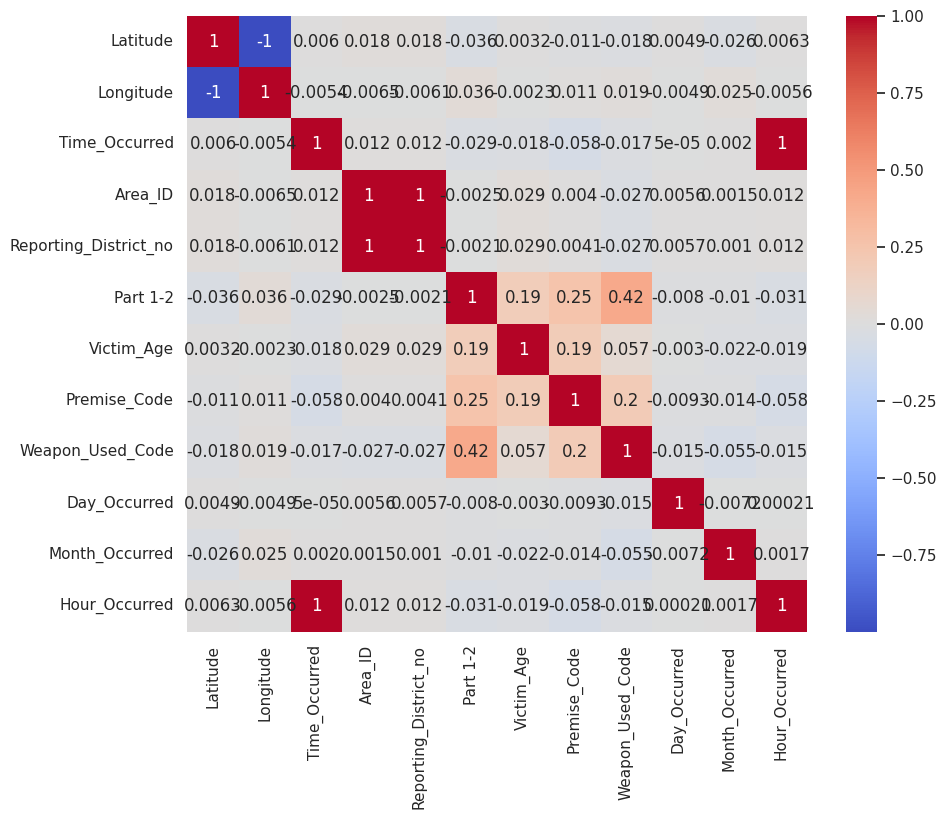

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data_copy.select_dtypes(include='number').corr(), annot =  True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Crime classification and weapon used are correlated
# Crime classification and premise code are correlated
# Crime classification and victim age are correlated
# Premise code and victim age are correlated
# Premise code and weapon used are correlated

In [ ]:
data['Part 1-2'].unique() #Crime classification

array([1., 2.])

In [ ]:
data['Premise_Code'].unique() #Premise code indicating the location of the crime.

array([101., 216., 501., 401., 502., 202., 104., 108., 121., 102., 203.,
       122., 707., 503., 506., 509., 710., 103., 602., 519., 406., 751.,
       210., 123., 801., 601., 243., 242., 504., 124., 505., 119., 252.,
       109., 704., 152., 120., 301., 404., 720., 405., 402., 213., 514.,
       248., 702., 708., 834., 212., 416., 954., 158., 403., 701., 721.,
       725., 605., 726., 912., 729., 139., 145., 208., 719., 201., 141.,
       107., 222., 144., 116., 507., 221., 254., 757., 217., 110., 408.,
       146., 510., 750., 229., 727., 249., 236., 738., 516., 735., 716.,
       908., 232., 517., 722., 515., 874., 518., 118., 127., 151., 932.,
       411., 415., 910., 414., 220., 255., 407., 239., 156., 233., 717.,
       900., 956., 949., 218., 732., 936., 244., 835., 715., 410., 231.,
       728., 417., 207., 247., 206., 913., 733., 409., 811., 235., 724.,
       902., 712., 941., 117., 412., 705., 512., 907., 142., 903., 953.,
       511., 753., 736., 205., 897., 875., 138., 70

In [ ]:
# sns.pairplot(data_copy.select_dtypes(include='number'), diag_kind = 'kde')
# plt.show()



*   Victim Age: The distribution appears to be bimodal, with peaks at different age ranges. This suggests that there are two common age groups among victims.


*   Latitude and Longitude: The distributions of latitude and longitude suggest that the crimes are concentrated in specific geographic areas, with latitude and longitude values clustered around particular points.


*   Time Occurred: The time distribution is relatively uniform, though there may be some peaks during certain hours (e.g., late night or early morning).








In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(weapon for weapon in data['Weapon_Description'])
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'White').generate(text)

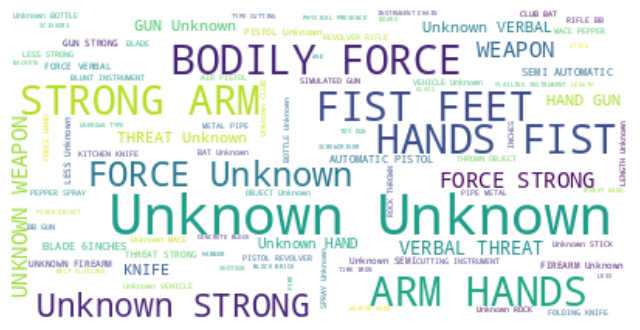

In [ ]:
plt.figure(figsize = (8,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
len(data['Modus_Operandi'].unique())/data.shape[0]

0.5245

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               20000 non-null  float64
 1   Longitude              20000 non-null  float64
 2   Time_Occurred          20000 non-null  float64
 3   Area_ID                20000 non-null  float64
 4   Area_Name              20000 non-null  object 
 5   Reporting_District_no  20000 non-null  float64
 6   Part 1-2               20000 non-null  float64
 7   Modus_Operandi         20000 non-null  object 
 8   Victim_Age             20000 non-null  float64
 9   Victim_Sex             20000 non-null  object 
 10  Premise_Code           20000 non-null  float64
 11  Premise_Description    20000 non-null  object 
 12  Weapon_Used_Code       7335 non-null   float64
 13  Weapon_Description     20000 non-null  object 
 14  Status                 20000 non-null  object 
 15  St

In [ ]:
data['Weapon_Used_Code'].unique()

array([ nan, 400., 511., 207., 102., 500., 307., 506., 312., 200., 302.,
       304., 109., 306., 215., 106., 114., 112., 305., 223., 204., 311.,
       515., 512., 218., 309., 212., 205., 103., 201., 219., 308., 113.,
       301., 310., 211., 214., 101., 107., 216., 111., 221., 104., 303.,
       206., 514., 105., 503., 510., 504., 501., 202., 513., 508., 210.,
       122., 115., 213.])

In [ ]:
num = [
    'Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
    'Reporting_District_no', 'Part 1-2', 'Victim_Age',
    'Premise_Code', 'Weapon_Used_Code','Month_Occurred', 'Hour_Occurred',
    'Year_Occurred', 'Day_of_Month_Occurred', 'Month_Reported',
    'Year_Reported', 'Day_of_Month_Reported','Day_of_Week_Occurred', 'Day_of_Week_Reported'
]

cat = [ 'Area_Name', 'Victim_Sex',
     'Status', 'Status_Description' ]

text = ['Premise_Description','Weapon_Description','Modus_Operandi']



In [ ]:
# Get unique elements from both test_data and data
element='Area_Name'
test_data_unique = set(test_data[element].unique())
data_unique = set(data[element].unique())

# Check if both sets are equal
if test_data_unique == data_unique:
    print('Both test_data and data have the same unique elements in ', element)
else:
    print("The unique elements in ", element," differ between test_data and data.")


Both test_data and data have the same unique elements in  Area_Name


In [ ]:
data.shape

(20000, 25)

In [ ]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipeline = Pipeline([('num_imputer',SimpleImputer(strategy='mean')),('scale',StandardScaler())])
cat_pipeline = Pipeline([('cat_imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
text_pipeline = Pipeline([('vectorizer',TfidfVectorizer())])

In [ ]:
# x_train.drop([text_drop],axis=1)

In [ ]:
x_train.columns

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code',
       'Weapon_Description', 'Status', 'Status_Description',
       'Day_of_Week_Occurred', 'Month_Occurred', 'Hour_Occurred',
       'Year_Occurred', 'Day_of_Month_Occurred', 'Day_of_Week_Reported',
       'Month_Reported', 'Year_Reported', 'Day_of_Month_Reported'],
      dtype='object')

In [ ]:
# Updated ColumnTransformers for text columns
Transformer1 = ColumnTransformer([('num_pipe', num_pipeline, num),('cat_pipe', cat_pipeline, cat)])
Transformer2 = ColumnTransformer([('text_premise', text_pipeline, 'Premise_Description')])
Transformer3 = ColumnTransformer([('text_weapon', text_pipeline, 'Weapon_Description')])
Transformer4 = ColumnTransformer([('text_modus', text_pipeline, 'Modus_Operandi')])
# Transformer5 = ColumnTransformer([('text_location', text_pipeline, ['Location'])])
# Transformer6 = ColumnTransformer([('text_cross_street', text_pipeline, ['Cross_Street'])])
# Transformer7 = ColumnTransformer([('text_victim_descent', text_pipeline, ['Victim_Descent'])])

In [ ]:
union = FeatureUnion([
    ('transformer1', Transformer1),
    ('transformer2', Transformer2),
    ('transformer3', Transformer3),
    ('transformer4', Transformer4),
    # ('transformer5', Transformer5),
    # ('transformer6', Transformer6),
    # ('transformer7', Transformer7)
])

In [ ]:
union

FeatureUnion(transformer_list=[('transformer1',
                                ColumnTransformer(transformers=[('num_pipe',
                                                                 Pipeline(steps=[('num_imputer',
                                                                                  SimpleImputer()),
                                                                                 ('scale',
                                                                                  StandardScaler())]),
                                                                 ['Latitude',
                                                                  'Longitude',
                                                                  'Time_Occurred',
                                                                  'Area_ID',
                                                                  'Reporting_District_no',
                                                                  'Part 1-2',
                                                                  'Victim_Age',
                                                                  'Premise_Code',
                                                                  'Weapon_Used_Code',
                                                                  'Month_Occurred',
                                                                  'Hour_Occurred',
                                                                  'Year_Occurred',
                                                                  'D...
                                                                 Pipeline(steps=[('vectorizer',
                                                                                  TfidfVectorizer())]),
                                                                 'Premise_Description')])),
                               ('transformer3',
                                ColumnTransformer(transformers=[('text_weapon',
                                                                 Pipeline(steps=[('vectorizer',
                                                                                  TfidfVectorizer())]),
                                                                 'Weapon_Description')])),
                               ('transformer4',
                                ColumnTransformer(transformers=[('text_modus',
                                                                 Pipeline(steps=[('vectorizer',
                                                                                  TfidfVectorizer())]),
                                                                 'Modus_Operandi')]))])

In [ ]:
X_train_transformed = union.fit_transform(x_train)
X_test_transformed = union.transform(x_test)

In [ ]:
test_data_transformed=union.transform(test_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_enc=OneHotEncoder(sparse=False)

y_train_enc=target_enc.fit_transform(y_train.to_frame())
y_train_md=pd.DataFrame(y_train_enc,columns=target_enc.get_feature_names_out([y_train.name]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_test_enc=target_enc.transform(y_test.to_frame())
y_test_md=pd.DataFrame(y_test_enc,columns=target_enc.get_feature_names_out([y_test.name]))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train_transformed, y_train_md)
y_pred_dtc = dtc.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dtc_multiclass = np.argmax(y_pred_dtc, axis=1)
y_test_multiclass = np.argmax(y_test_md.values, axis=1)
accuracy_score(y_test_multiclass, y_pred_dtc_multiclass)

0.93425

In [ ]:
dtc.predict(test_data_transformed)

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

In [ ]:
y_train_reversed = target_enc.inverse_transform(dtc.predict(test_data_transformed))

y_train_reversed_df = pd.DataFrame(y_train_reversed, columns=[y_train.name])
y_train_reversed_df.to_csv('submission.csv', index=False)